In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [68]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421051,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798393,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771530,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191574,144114400


In [69]:
df = df.reset_index()

In [70]:
df['Date'].head()

0   2010-01-04
1   2010-01-05
2   2010-01-06
3   2010-01-07
4   2010-01-08
Name: Date, dtype: datetime64[ns]

In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.tail()

,Open,High,Low,Close,Volume
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000
2514,72.364998,73.172501,71.305000,72.879997,144114400


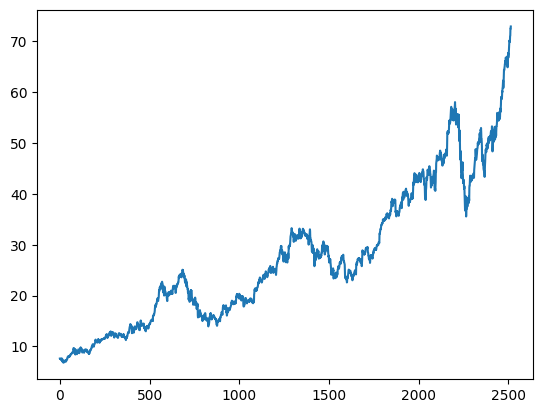

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

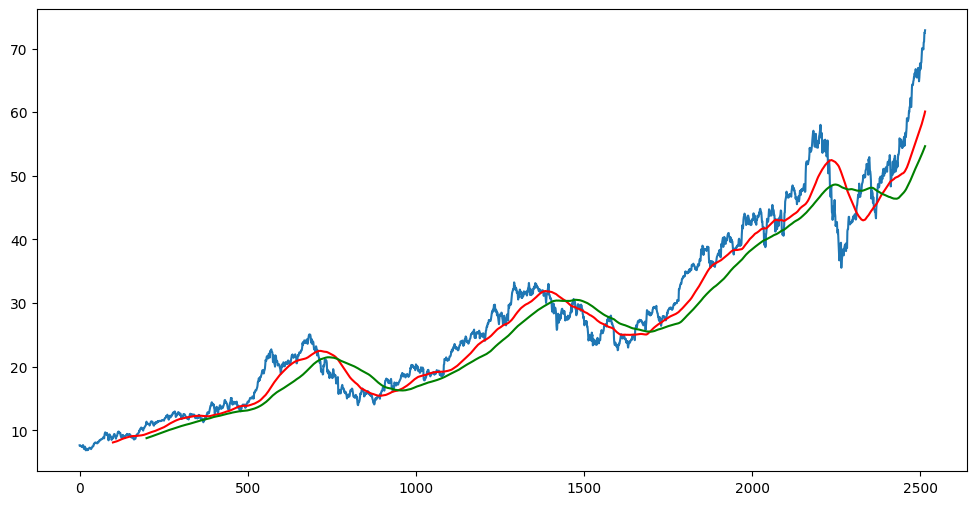

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
df.shape

(2515, 5)

In [11]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training)

          Close
0      7.643214
1      7.656429
2      7.534643
3      7.520714
4      7.570714
...         ...
1755  29.264999
1756  29.072500
1757  29.129999
1758  29.315001
1759  29.190001

[1760 rows x 1 columns]


In [12]:
print(data_testing)

          Close
1760  29.182501
1761  28.955000
1762  29.037500
1763  29.004999
1764  29.152500
...         ...
2510  71.000000
2511  71.067497
2512  72.477501
2513  72.449997
2514  72.879997

[755 rows x 1 columns]


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [15]:
data_training_array.shape

(1760, 1)

In [56]:
data_testing.shape

(755, 1)

In [43]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       [[0.02560389],
        [0.02507608],
        [0.02697067],
        ...,
        [0.07045129],
        [0.08295551],
        [0.08773258]],

       ...,

       [[0.74224237],
        [0.74300022],
        [0.7582516 ],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

In [44]:
#ML MODEL

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 7s 107ms/step - loss: 0.0616
Epoch 2/50
52/52 [==============================] - 6s 108ms/step - loss: 0.0114
Epoch 3/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0098
Epoch 4/50
52/52 [==============================] - 6s 112ms/step - loss: 0.0091
Epoch 5/50
52/52 [==============================] - 6s 116ms/step - loss: 0.0092
Epoch 6/50
52/52 [==============================] - 6s 110ms/step - loss: 0.0078
Epoch 7/50
52/52 [==============================] - 6s 110ms/step - loss: 0.0076
Epoch 8/50
52/52 [==============================] - 6s 110ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0078
Epoch 10/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0066
Epoch 11/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0069
Epoch 12/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0067
Epoch 13/50
52/52 [======

In [26]:
model.save('keras_model.keras')

In [46]:
past_100_days = data_training.tail(100)

In [50]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/var/folders/87/cxqpfc9x3vd1j0n6lhnp833w0000gn/T/ipykernel_2530/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [52]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [54]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [55]:
input_data.shape

(855, 1)

In [57]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [58]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [59]:
#Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 27ms/step


In [60]:
y_predicted.shape

(755, 1)

In [61]:
y_predicted

array([[0.14793947],
       [0.14883466],
       [0.14961444],
       [0.15024814],
       [0.15072246],
       [0.15104276],
       [0.15124114],
       [0.15137346],
       [0.15150149],
       [0.15168223],
       [0.15195674],
       [0.15234107],
       [0.15283985],
       [0.15344892],
       [0.15414825],
       [0.15490825],
       [0.15569583],
       [0.15647563],
       [0.1572333 ],
       [0.15797152],
       [0.15869433],
       [0.15940137],
       [0.16008478],
       [0.16081789],
       [0.16171402],
       [0.16286924],
       [0.16436449],
       [0.1662621 ],
       [0.16854048],
       [0.17121446],
       [0.17420244],
       [0.17744727],
       [0.18089826],
       [0.18450643],
       [0.18821254],
       [0.1919545 ],
       [0.19567971],
       [0.19934395],
       [0.20289913],
       [0.20630066],
       [0.20951363],
       [0.2125119 ],
       [0.21530305],
       [0.21790835],
       [0.2203656 ],
       [0.22269478],
       [0.22490293],
       [0.226

In [62]:
scaler.scale_

array([0.02123255])

In [63]:
scale_factor = 1/0.02123255

In [64]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

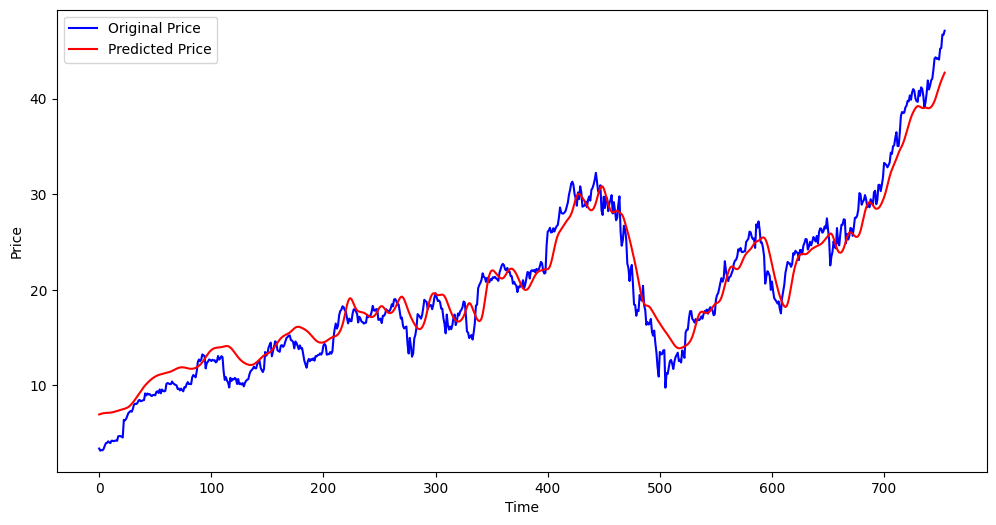

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()